# Logistic Regression

## 1.Create dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
np.random.seed(22)

def mkdir_if_not_exist(path):
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [2]:
X0 = np.array([[0.5, 1.5, 0.75, 1.75, 2.5, 3.5, 1.0, 1.25, 2.0, 3.0]])
X1 = np.array([[2.25, 3.25, 4.5, 4.75, 1.75, 2.75, 4.0, 5.0, 4.25, 5.5]])

X = np.concatenate((X0, X1), axis = 1)
y = np.asarray([0]*X0.size + [1]*X1.size)

X, y
data_file = '../data/LogR1.csv'
mkdir_if_not_exist('../data')
with open (data_file, 'w') as f:
    f.write('Hours,Pass\n')
    for i in range(X.size):
        str0 = '{},{}\n'.format(X[0][i], y[i])
        f.write(str0)

## 2. Load dataset

In [3]:
import pandas as pd

data_file = '../data/LogR1.csv'
data = pd.read_csv(data_file)
inputs ,outputs = data.iloc[:, 0:1], data.iloc[:, -1]
X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[0.5 ],
        [1.5 ],
        [0.75],
        [1.75],
        [2.5 ],
        [3.5 ],
        [1.  ],
        [1.25],
        [2.  ],
        [3.  ],
        [2.25],
        [3.25],
        [4.5 ],
        [4.75],
        [1.75],
        [2.75],
        [4.  ],
        [5.  ],
        [4.25],
        [5.5 ]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

<ipython-input-4-ab15179be873>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


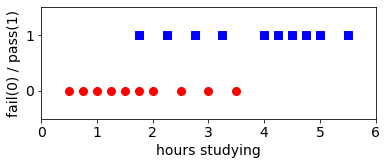

In [4]:
y0 = np.asarray([0]*X0.size)
y1 = np.asarray([1]*X1.size)

plt.plot(X0.T, y0, 'ro', markersize = 8)
plt.plot(X1.T, y1, 'bs', markersize = 8)

plt.axis([0, 6, -.5, 1.5])
cur_axes = plt.gca()
plt.xlabel('hours studying', fontsize = 14)
plt.ylabel('fail(0) / pass(1)', fontsize = 14)
cur_axes.axes.get_yaxis().set_ticks([0, 1])
plt.axes().set_aspect('equal')
plt.tick_params(axis='both', which='major', labelsize=14)

plt.show()

## 3. Build Sigmoid Function

In [16]:
def sigmoid(S):
    return 1/(1 + np.exp(-S))

def prob(w, X):
    return sigmoid(X.dot(w))

def loss(w, X, y, lam):
    z = prob(w, X)
    return -np.mean(y*np.log(z) + (1-y)*np.log(1-z)) + 0.5*lam/X.shape[0]*np.sum(w*w)

def LogR(w_init, X, y, lam=0.001, lr=0.1, nepoches=2000):
    w = w_old = w_init
    N, d = X.shape[0], X.shape[1]
    loss_hist = [loss(w_init, X, y, lam)]
    ep = 0
    while ep < nepoches:
        ep += 1
        mix_ids = np.random.permutation(N)
        for i in mix_ids:
            xi = X[i]
            yi = y[i]
            zi = sigmoid(xi.dot(w))
            w = w - lr*((zi - yi)*xi + lam*w)
        loss_hist.append(loss(w, X, y, lam))
        if np.linalg.norm(w - w_old)/d < 1e-6:
            break
        w_old = w
    return w, loss_hist

np.random.seed(2)

In [17]:
Xbar = np.concatenate((np.zeros((X.shape[0], 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
lam = 0.0001
w1, loss_hist1 = LogR(w_init, Xbar, y, lam, lr = 0.05, nepoches=500)
print(w1)
print(loss(w1, Xbar, y, lam))

[-0.39643228  0.32423496]
0.6505739169528659


## Loss:

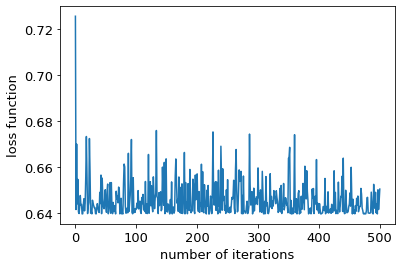

In [18]:
plt.plot(loss_hist1)
plt.xlabel('number of iterations', fontsize = 13)
plt.ylabel('loss function', fontsize = 13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

## 4. Solution by sklearn

In [25]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(C = 2/lam)
model.fit(X, y)

w2 = np.array([model.coef_[0][0], model.intercept_[0]])
print(w2)
print(loss(w2, Xbar, y, lam))

[ 1.50461548 -4.07763981]
7.757334159912461


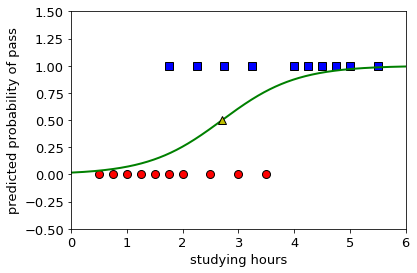

In [27]:
plt.plot(X0.T, y0, 'ro', markersize = 8, markeredgecolor = 'k')
plt.plot(X1.T, y1, 'bs', markersize = 8, markeredgecolor = 'k')
xx = np.linspace(0, 6, 1000)
w0 = w2[1]
w1 = w2[0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 8, markeredgecolor = 'k')
plt.xlabel('studying hours', fontsize = 13)
plt.ylabel('predicted probability of pass', fontsize = 13)
plt.axis([0, 6, -.5, 1.5])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()